In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud
import tensorflow as tf

2024-05-28 13:30:03.602622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 13:30:03.602728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 13:30:03.701880: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df= pd.read_csv('/kaggle/input/twitter-sentiment/twitter_training.csv')

In [3]:
df.shape

(74681, 4)

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.rename(columns={
    '2401': 'id', 
    'Borderlands': 'Entities',
    'Positive': 'Sentiment',
    'im getting on borderlands and i will murder you all ,': 'Text'
    }, inplace=True)

In [6]:
df.head()

,id,Entities,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.isnull().sum()

id             0
Entities       0
Sentiment      0
Text         686
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

id           0
Entities     0
Sentiment    0
Text         0
dtype: int64

In [10]:
df.describe()

,id
count,73995.000000
mean,6430.333685
std,3737.655932
min,1.000000
25%,3194.000000
50%,6418.000000
75%,9595.000000
max,13200.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73995 non-null  int64 
 1   Entities   73995 non-null  object
 2   Sentiment  73995 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [12]:
df.columns

Index(['id', 'Entities', 'Sentiment', 'Text'], dtype='object')

In [13]:
df.drop(columns=['id', 'Entities'], inplace=True)

In [14]:
df.head()

,Sentiment,Text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [15]:
df.dtypes

Sentiment    object
Text         object
dtype: object

In [16]:
df.describe()

,Sentiment,Text
count,73995,73995
unique,4,69490
top,Negative,
freq,22358,172


In [17]:
df.duplicated().sum()

4227

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(69768, 2)

In [20]:
df.describe()

,Sentiment,Text
count,69768,69768
unique,4,69490
top,Negative,by
freq,21237,4


In [21]:
df.duplicated().sum()

0

In [22]:
# Count the occurrences of each sentiment
sentiment_content = df['Sentiment'].value_counts()
print('total sentiments are:', len(sentiment_content))

total sentiments are: 4


In [23]:
#pd.set_option('display.max_rows', len(sentiment_content))
print(sentiment_content)

Sentiment
Negative      21237
Positive      19137
Neutral       17110
Irrelevant    12284
Name: count, dtype: int64


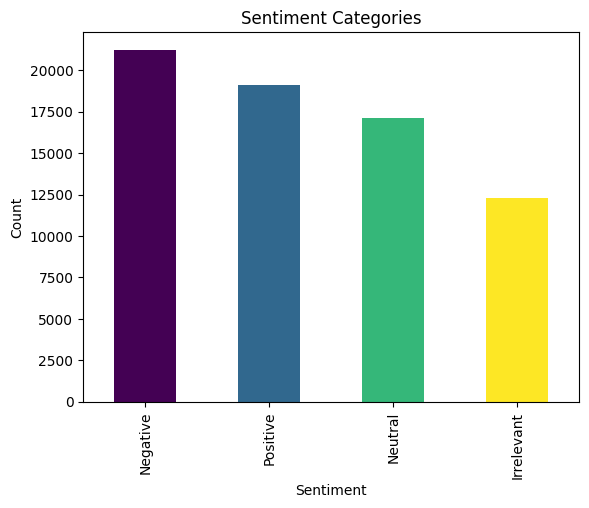

In [24]:
# Generate colors for the bar plot
color = plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]

# Plot the sentiment counts
sentiment_content.plot(kind='bar', color=colors)

# Add titles and labels
plt.title('Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


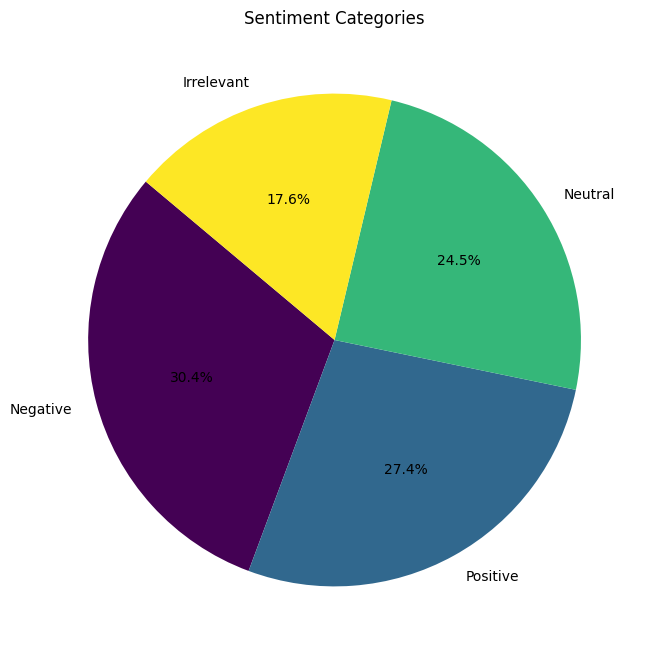

In [25]:
# Generate colors for the pie chart
color = plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]

# Plot the sentiment counts as a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size for better readability
sentiment_content.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Sentiment Categories')

# Show the plot
plt.ylabel('')  # Remove the y-label as it is not needed for a pie chart
plt.show()


In [26]:
df.head()

,Sentiment,Text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


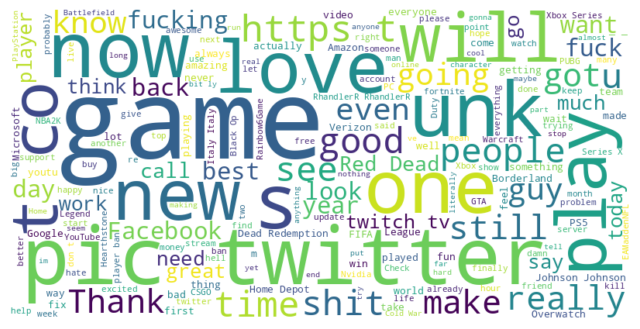

In [27]:
world_cloud= WordCloud(width=800, height=400, background_color= 'white').generate(''. join(df['Text']))

plt.figure(figsize=(8,8))
plt.imshow(world_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
import re       #for regular expression
import nltk     #for NLP tasks
from nltk.tokenize import word_tokenize    #tokenize the input text into the list of words
from nltk.corpus import stopwords   #for getting stopwords
from nltk.stem import WordNetLemmatizer   #reducing words into their base form (like rocks....rock)
import os
import zipfile

In [29]:
download_dir = '/kaggle/working/nltk_data'

# Download the required datasets
nltk.download('wordnet', download_dir=download_dir)
nltk.download('omw-1.4', download_dir=download_dir)

# Set the NLTK data path to the download directory
nltk.data.path.append(download_dir)


[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...


In [30]:
# Define the extraction directory
extraction_dir = os.path.join(download_dir, 'corpora')

In [31]:
# Ensure the extraction directory exists
os.makedirs(extraction_dir, exist_ok=True)

# Unzipping downloaded corpora if necessary (usually not needed as NLTK handles this)
wordnet_zip_path = os.path.join(extraction_dir, 'wordnet.zip')
omw_zip_path = os.path.join(extraction_dir, 'omw-1.4.zip')

if os.path.exists(wordnet_zip_path):
    with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_dir)

if os.path.exists(omw_zip_path):
    with zipfile.ZipFile(omw_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_dir)

# Verify the contents of the nltk_data directory
for root, dirs, files in os.walk(download_dir):
    for name in dirs:
        print(os.path.join(root, name))
    for name in files:
        print(os.path.join(root, name))

/kaggle/working/nltk_data/corpora
/kaggle/working/nltk_data/corpora/wordnet
/kaggle/working/nltk_data/corpora/omw-1.4
/kaggle/working/nltk_data/corpora/wordnet.zip
/kaggle/working/nltk_data/corpora/omw-1.4.zip
/kaggle/working/nltk_data/corpora/wordnet/adj.exc
/kaggle/working/nltk_data/corpora/wordnet/README
/kaggle/working/nltk_data/corpora/wordnet/lexnames
/kaggle/working/nltk_data/corpora/wordnet/index.adj
/kaggle/working/nltk_data/corpora/wordnet/adv.exc
/kaggle/working/nltk_data/corpora/wordnet/index.noun
/kaggle/working/nltk_data/corpora/wordnet/index.sense
/kaggle/working/nltk_data/corpora/wordnet/index.verb
/kaggle/working/nltk_data/corpora/wordnet/noun.exc
/kaggle/working/nltk_data/corpora/wordnet/data.adv
/kaggle/working/nltk_data/corpora/wordnet/data.noun
/kaggle/working/nltk_data/corpora/wordnet/data.adj
/kaggle/working/nltk_data/corpora/wordnet/verb.exc
/kaggle/working/nltk_data/corpora/wordnet/LICENSE
/kaggle/working/nltk_data/corpora/wordnet/citation.bib
/kaggle/working/n

In [32]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text= text.lower()
    words= word_tokenize(text)

    lemmatizer= WordNetLemmatizer()
    words=[lemmatizer.lemmatize(word) for word in words]

    stop_words= set(stopwords.words('english'))
    Words= [word for word in words if word not in stop_words]
    Words= [word for word in Words if len(word) > 3]

    indices= np.unique(Words, return_index=True)[1]
    cleaned_text= np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [33]:
df.columns

Index(['Sentiment', 'Text'], dtype='object')

In [34]:
x=df.drop('Sentiment', axis=1)
y=df.Sentiment

In [35]:
texts= list(x['Text'])

In [36]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
cleaned_text= [process_text(text) for text in texts]

In [38]:
print(cleaned_text[:10])

[['coming', 'border', 'kill'], ['getting', 'borderland', 'kill'], ['coming', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['getting', 'borderland', 'murder'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'couple', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'picture', 'compared', 'creation', 'made', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'something', 'know', 'huge', 'borderland', 'maya', 'favorite', 'character'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya', 'favorite', 'character', 'decided', 'make', 'wallpaper', 'original', 'image', 'versus', 'creation', 'made', 'enjoy', 'twitter', 'mlsiwfjg'], ['spent', 'hour', 'making', 'something', 'know', 'huge', 'rhandlerr', 'maya

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow .keras.preprocessing.sequence import pad_sequences

In [41]:
max_vocab=20000
tokenizer= Tokenizer(num_words= max_vocab)
tokenizer.fit_on_texts(X_train)
word_index= tokenizer.word_index
v= len(word_index)
print('The length of vocab is: ', v)

The length of vocab is:  23664


In [42]:
X_train= tokenizer.texts_to_sequences(X_train)
X_test= tokenizer.texts_to_sequences(X_test)

In [43]:
max_len= 100
X_train= pad_sequences(X_train, maxlen= max_len)
X_test= pad_sequences(X_test, maxlen=max_len)

In [44]:
y.value_counts()

Sentiment
Negative      21237
Positive      19137
Neutral       17110
Irrelevant    12284
Name: count, dtype: int64

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Input, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

In [46]:
# Parameters
vocab_size = 20000
embedding_dim = 16
lstm_dim = 32
dense_dim = 24
input_length = 100

In [47]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_length,)),  # Explicitly specify the input shape
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [48]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,204 (1.27 MB)

 Trainable params: 334,204 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
y_train_encoded= label_encoder.fit_transform(y_train)
y_test_encoded= label_encoder.transform(y_test)

In [51]:
y_train_one_hot= tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot= tf.keras.utils.to_categorical(y_test_encoded)

In [52]:
history= model.fit(
    X_train,
    y_train_one_hot,
    epochs= 40,
    validation_data= (X_test, y_test_one_hot)
)

Epoch 1/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.4444 - loss: 0.5023 - val_accuracy: 0.7411 - val_loss: 0.3013
Epoch 2/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8133 - loss: 0.2290 - val_accuracy: 0.8211 - val_loss: 0.2210
Epoch 3/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8790 - loss: 0.1502 - val_accuracy: 0.8350 - val_loss: 0.1992
Epoch 4/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8994 - loss: 0.1214 - val_accuracy: 0.8465 - val_loss: 0.1936
Epoch 5/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9123 - loss: 0.1039 - val_accuracy: 0.8495 - val_loss: 0.1893
Epoch 6/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9212 - loss: 0.0923 - val_accuracy: 0.8459 - val_loss: 0.2066
Epoch 7/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9259 - loss: 0.0856 - val_accuracy: 0.8532 - val_loss: 0.2027
Epoch 8/40
1745/1745 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9331 -

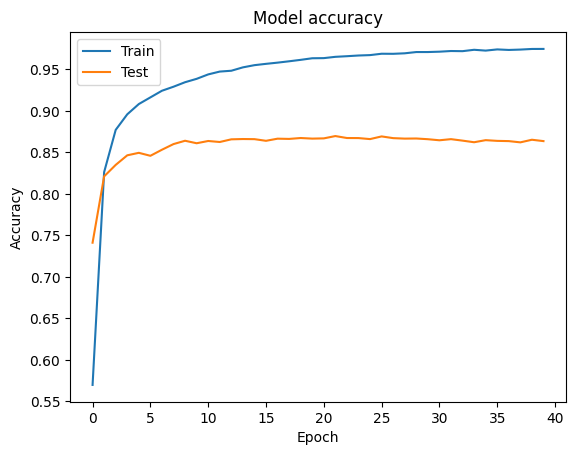

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

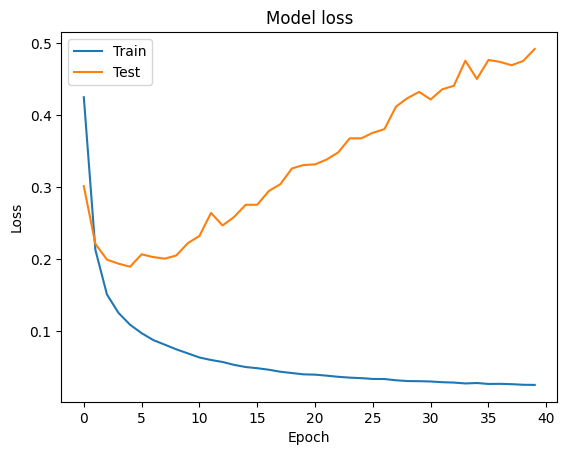

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [55]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8625 - loss: 0.4959
Test Loss: 0.49210628867149353
Test Accuracy: 0.863623321056366


437/437 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


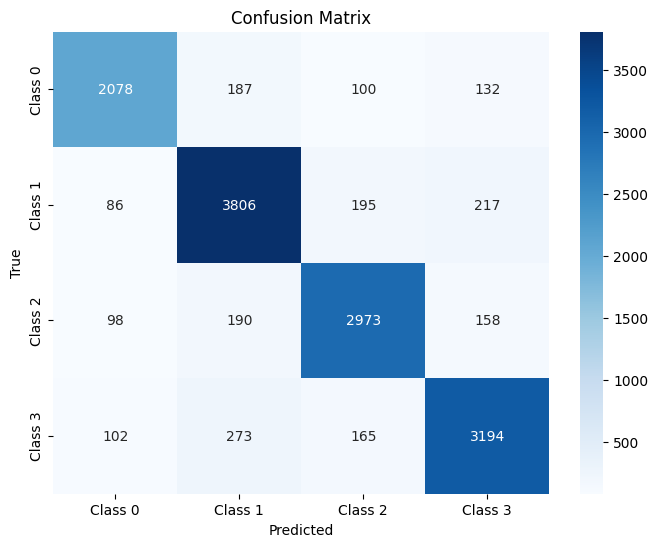

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()